In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from utils.preprocess_data import load_dataset
import os
import datetime

In [2]:
# Loading train and validation split 
train_data = load_dataset(split="train")
val_data = load_dataset(split="valid")

## Duration

In [3]:
def calculate_duration_in_minutes(start_timestamp, end_timestamp):
    # Convert Unix timestamps to datetime objects
    start_datetime = datetime.datetime.fromtimestamp(int(start_timestamp/1000), datetime.UTC)
    end_datetime = datetime.datetime.fromtimestamp(int(end_timestamp/1000), datetime.UTC)
    # Calculate the duration in seconds
    duration_seconds = (end_datetime - start_datetime).total_seconds()
    # Convert seconds to minutes
    duration_minutes = duration_seconds / 60
    return duration_minutes

def convert_decimal_to_min_sec(decimal_minutes):
    # Extract integer part as minutes
    minutes = int(decimal_minutes)
    
    # Convert remaining decimal part to seconds
    remaining_seconds = decimal_minutes * 60 % 60
    
    # Format the result as minutes and seconds
    min_sec_format = '{:02d}:{:02d}'.format(minutes, int(remaining_seconds))
    
    return min_sec_format

In [4]:
length = []
duration = []
for trial_num in range(len(os.listdir("data/train"))):
    length_trial = len(train_data.loc[trial_num])
    length.append(length_trial)
    start = train_data.loc[trial_num, "tStart"][0]
    end = train_data.loc[trial_num, "tStart"][length_trial-1]
    duration.append(calculate_duration_in_minutes(start,end))

In [5]:
print(f"Minimal length (timesteps): {min(length)}, Maximal length (timesteps):{max(length)}")
print(f"Minimal duration (min:secs): {convert_decimal_to_min_sec(min(duration))}, Maximal duration (min:secs): {convert_decimal_to_min_sec(max(duration))}")

Minimal length (timesteps): 550, Maximal length (timesteps):2245
Minimal duration (min:secs): 00:34, Maximal duration (min:secs): 02:21


## Correlation

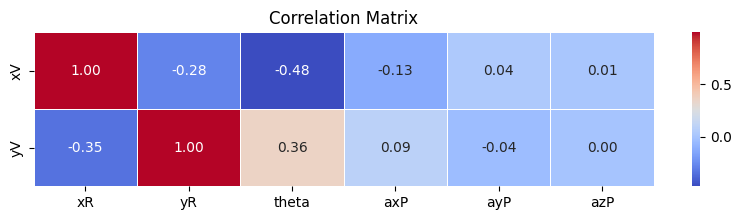

In [6]:
rpi_data = load_dataset(split="rpi")
correlation_matrix = rpi_data[["xR","yR","theta","xV","yV","axP","ayP","azP"]].corr()

plt.figure(figsize=(10, 2))
sns.heatmap(correlation_matrix.loc[["xV","yV"],:].drop(columns=["xV","yV"]), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Delay

In [12]:
# calculate mean delay for all data

delay_train = train_data["tV"]-train_data["tStart"]
delay_valid = val_data["tV"]-val_data["tStart"]
stacked_series = pd.concat([delay_train, delay_valid])

print(f"TRAIN: Maximal {np.max(delay_train)}, Mean {np.mean(delay_train)} with std of {np.std(delay_train)}")
print(f"VALID: Maximal {np.max(delay_valid)}, Mean {np.mean(delay_valid)} with std of {np.std(delay_valid)}")
print(f"ALL: Maximal {np.max(stacked_series)}, Mean {np.mean(stacked_series)} with std of {np.std(stacked_series)}")


TRAIN: Maximal 37.3837890625, Mean 5.734114323860205 with std of 2.075698999341072
VALID: Maximal 51.897705078125, Mean 5.798767372741346 with std of 2.3797074244784056
ALL: Maximal 51.897705078125, Mean 5.750284612567472 with std of 2.155940118261478


### Delay with RPi

In [13]:
delay_rpi = rpi_data["tV"]-rpi_data["tStart"]
print(f"ALL: Maximal {np.max(delay_rpi)}, Mean {np.mean(delay_rpi)} with std of {np.std(delay_rpi)}")

ALL: Maximal 546.4375, Mean 30.2354697305906 with std of 12.888380762434592
